In [23]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('train_features.csv')
test_df = pd.read_csv('test_features.csv')
val_df = pd.read_csv('validation_features.csv')

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13956 entries, 0 to 13955
Columns: 195 entries, 0 to label
dtypes: float64(194), int64(1)
memory usage: 20.8 MB


In [25]:
# Remove empty column '190'
train_df = train_df.drop(columns=['190'])
test_df = test_df.drop(columns=['190'])
val_df = val_df.drop(columns=['190'])

In [26]:
# Separate features and labels
X_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values

X_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values

X_val = val_df.drop(columns=['label']).values
y_val = val_df['label'].values

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout

In [28]:
# Reshape data to add a channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [15]:
# Build CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
437/437 [==============================] - 19s 37ms/step - loss: 1.0042 - accuracy: 0.5064 - val_loss: 0.6897 - val_accuracy: 0.4950
Epoch 2/100
437/437 [==============================] - 17s 39ms/step - loss: 0.6935 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
437/437 [==============================] - 15s 34ms/step - loss: 0.6931 - accuracy: 0.4926 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
437/437 [==============================] - 15s 35ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
437/437 [==============================] - 15s 34ms/step - loss: 0.6936 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
437/437 [==============================] - 15s 34ms/step - loss: 0.6934 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
437/437 [==============================] - 15s 35ms/step - loss: 0.6934 - accuracy: 0.5027 - val_loss: 0.6932 - val_ac

437/437 [==============================] - 15s 33ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 58/100
437/437 [==============================] - 15s 35ms/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 59/100
437/437 [==============================] - 21s 49ms/step - loss: 0.6932 - accuracy: 0.4915 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 60/100
437/437 [==============================] - 17s 39ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 61/100
437/437 [==============================] - 16s 36ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 62/100
437/437 [==============================] - 16s 36ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 63/100
437/437 [==============================] - 15s 35ms/step - loss: 0.6932 - accuracy: 0.4937 - val_loss: 0.6932 - val_accuracy

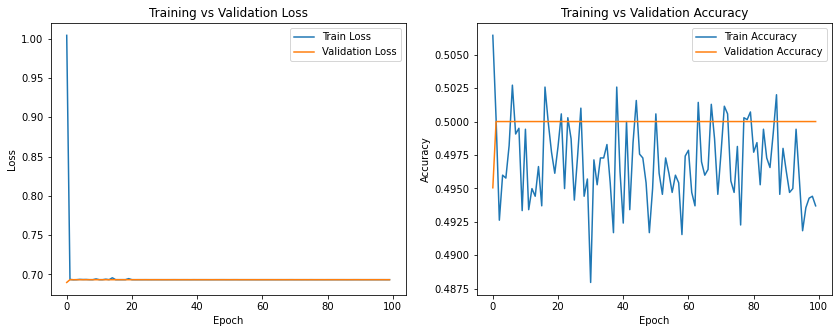

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

34/34 [==============================] - 1s 7ms/step


In [19]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       544
           1       0.00      0.00      0.00       544

    accuracy                           0.50      1088
   macro avg       0.25      0.50      0.33      1088
weighted avg       0.25      0.50      0.33      1088



C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


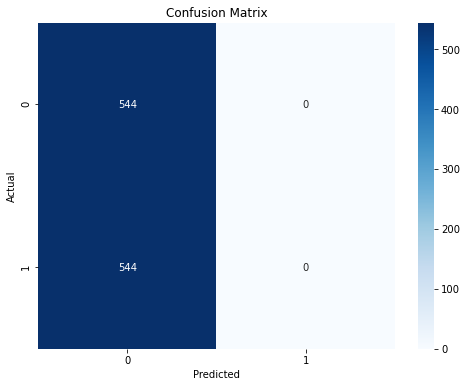

In [20]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
# Evaluate the model on the test data
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)

89/89 [==============================] - 1s 6ms/step


In [30]:
# Classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1413
           1       0.00      0.00      0.00      1413

    accuracy                           0.50      2826
   macro avg       0.25      0.50      0.33      2826
weighted avg       0.25      0.50      0.33      2826



C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
